# Sunspot Analysis
Analysis of monthly mean total sunspot number from 1/1749 to now.

### Import useful libraries

In [36]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as md
import statistics
import scipy.signal as ss
from pandas.plotting import autocorrelation_plot

### Read data from file

In [37]:
def read_data(file_name):
    col_names = ['Year', 'Month', 'DateInFractionOfYear', 'MonthlyMeanTotalSunspotNumber',
                 'MonthlyMeanStandardDeviation', 'NumberOfObservations', 'DefinitiveProvisionalMarker']
    dataframe = pd.read_csv(file_name, names=col_names, delimiter=';')
    dataframe['Date'] = dataframe.Year.apply(str) + '-' + dataframe.Month.apply(str)
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataset = dataframe.set_index('Date')

    return dataset

In [38]:
sunspot_dataframe = read_data('data/SN_m_tot_V2.0.csv')
sunspot_dataframe.head()

,Year,Month,DateInFractionOfYear,MonthlyMeanTotalSunspotNumber,MonthlyMeanStandardDeviation,NumberOfObservations,DefinitiveProvisionalMarker
Date,,,,,,,
1749-01-01,1749,1,1749.042,96.7,-1.0,-1,1
1749-02-01,1749,2,1749.123,104.3,-1.0,-1,1
1749-03-01,1749,3,1749.204,116.7,-1.0,-1,1
1749-04-01,1749,4,1749.288,92.8,-1.0,-1,1
1749-05-01,1749,5,1749.371,141.7,-1.0,-1,1


### Calculate descriptive statistics 

In [39]:
def calculate_stats(data):
    print("Mean = " + str('{0:.2f}'.format(statistics.mean(data))))
    print("Median = " + str('{0:.2f}'.format(statistics.median(data))))
    print("Standard Deviation = " + str('{0:.2f}'.format(nm.std(data))))
    print("Variance = " + str('{0:.2f}'.format(statistics.variance(data))))
    print("Min = " + str('{0:.2f}'.format(min(data))))
    print("Max = " + str('{0:.2f}'.format(max(data))))

In [40]:
calculate_stats(sunspot_dataframe.MonthlyMeanTotalSunspotNumber)

Mean = 81.59
Median = 66.85
Standard Deviation = 67.80
Variance = 4597.58
Min = 0.00
Max = 398.20


### Create copy of DataFrame object and remove unused data

In [41]:
def create_data_copy(data):
    df_copy = data.copy()
    df_copy.drop('Year', axis=1, inplace=True)
    df_copy.drop('Month', axis=1, inplace=True)
    df_copy.drop('DateInFractionOfYear', axis=1, inplace=True)
    df_copy.drop('MonthlyMeanStandardDeviation', axis=1, inplace=True)
    df_copy.drop('NumberOfObservations', axis=1, inplace=True)
    df_copy.drop('DefinitiveProvisionalMarker', axis=1, inplace=True)

    return df_copy

In [42]:
dataframe_copy = create_data_copy(sunspot_dataframe)
dataframe_copy.head()

,MonthlyMeanTotalSunspotNumber
Date,
1749-01-01,96.7
1749-02-01,104.3
1749-03-01,116.7
1749-04-01,92.8
1749-05-01,141.7


### Draw a plot

In [43]:
def sunspot_plot(data):
    peaks_negative, _ = ss.find_peaks(-data.MonthlyMeanTotalSunspotNumber, height=-12, threshold=None, distance=100)
    plt.figure(figsize=(14, 8))

    plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y.%m'))
    plt.gca().xaxis.set_major_locator(md.MonthLocator(interval=132))
    plt.plot(data.index, data.MonthlyMeanTotalSunspotNumber)
    plt.gcf().autofmt_xdate()

    plt.plot_date(data.index[peaks_negative], data.MonthlyMeanTotalSunspotNumber[peaks_negative], 'go',
                  label='negative peaks')

    plt.title("All Monthly Observations")
    plt.xlabel("Date")
    plt.ylabel("Monthly Mean Total Sunspot Number")
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

    return sunspot_dataframe.index[peaks_negative]

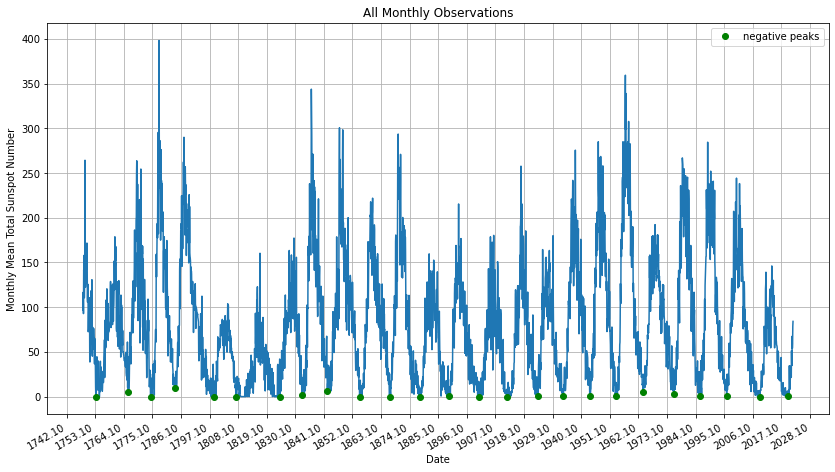

In [44]:
data_peaks = sunspot_plot(sunspot_dataframe)

* Created plot shows that analyzed data is not random and that there is some periodicity called the solar cycle.
* A monthly number of sunspots increases rapidly within a cycle and decrease slower.
* There is some asymmetry. When Sun reaches its maximum connected with solar activity, the number of sunspots starts decreasing rapidly. However, when it reaches its minimum, it stays longer in that state.
* There is a  period of smaller solar activity called Dalton minimum [1790-1830] which could cause cooler temperatures on Earth.

### Draw a box plot

In [45]:
def draw_boxplot(data, peaks):
    period = [0, 0, 0, 0, 0]
    temp = 0

    for p in range(5):
        period[p] = data.loc[(data.index >= peaks[temp]) & (data.index <= peaks[temp + 5])]
        period[p] = period[p].MonthlyMeanTotalSunspotNumber

        if temp >= 15:
            temp = temp + 4
        else:
            temp = temp + 5

    plt.figure(figsize=(14, 8))
    plt.boxplot(period, showmeans=True)
    plt.title("Boxplot")
    plt.xlabel("Period")
    plt.ylabel("Monthly Mean Total Sunspot Number")
    plt.show()

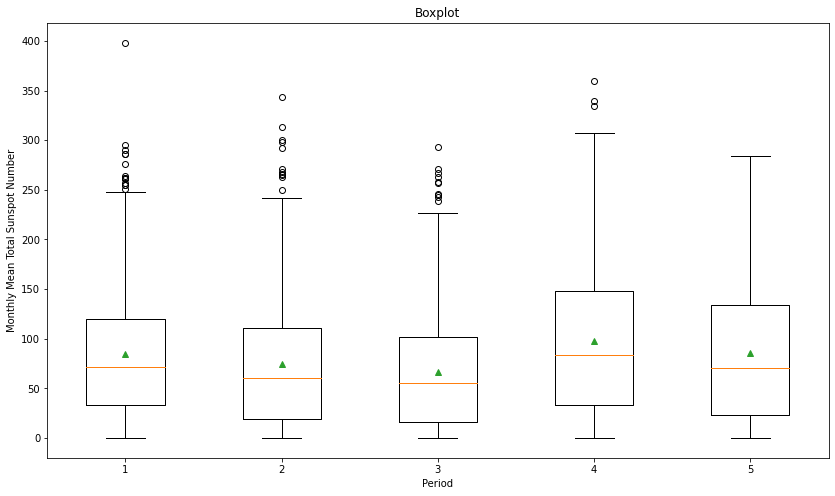

In [46]:
draw_boxplot(sunspot_dataframe, data_peaks)

* A box plot compares five subsequent solar periods. There are five small solar cycles per first four periods. The last one contains four cycles.
* Each period lasts about 55 years. 
* There is some periodicity - each median = 75, each average = 80 and minimum is equal almost 0. However, the maximum is equal between 220 to 300. It can suggest that there were some periods with a larger number of sunspots which can cause greater solar activity. 
* There is a large number of outliers in periods one to four.

### Draw an autocorrelation plot

In [47]:
def draw_autocorrelation_plot(data):
    plt.figure(figsize=(14, 8))
    autocorrelation_plot(data, color='dodgerblue')
    plt.title("Autocorrelation Plot")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.grid(True)
    plt.show()

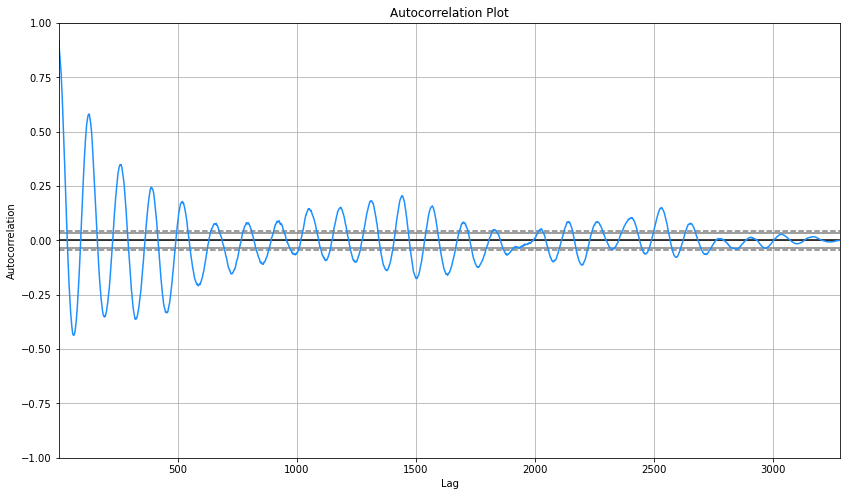

In [48]:
draw_autocorrelation_plot(dataframe_copy)

* An autocorrelation plot can help determine a small solar cycle. It lasts 10.67 years approximately.
* Also, a large solar cycle can be determined. It lasts around 120 years. 

### Draw a histogram plot

In [51]:
def draw_histogram(data):
    bins = nm.arange(0, 401, 10)
    data.hist(bins=bins, figsize=(15, 5), color='steelblue', edgecolor='darkslategrey', grid=False)
    plt.title("Frequency of Monthly Mean Total Sunspot Number - Histogram")
    plt.xlabel("Monthly Mean Total Sunspot Number")
    plt.ylabel("Frequency")
    plt.show()

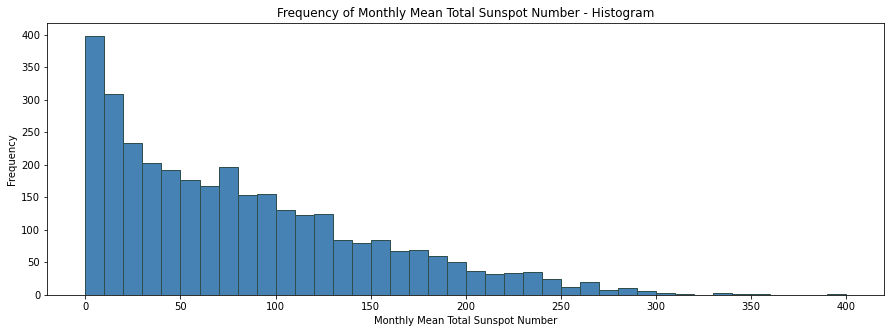

In [52]:
draw_histogram(dataframe_copy)

* It is not a normal distribution.

### Calculate the length of a small and large solar cycle

In [53]:
def find_cycles(data):
    lag_vals = nm.arange(12 * 15)
    autocorr_ser = nm.array([data['MonthlyMeanTotalSunspotNumber'].autocorr(lag=n) for n in lag_vals])
    years = ss.argrelextrema(autocorr_ser, nm.greater, order=2)[0][0] / 12
    print("Small solar cycle = " + str('{0:.2f}'.format(years)) + " years")

    lag_vals = nm.arange(1700)
    autocorr_ser = nm.array([data['MonthlyMeanTotalSunspotNumber'].autocorr(lag=n) for n in lag_vals])
    years = ss.argrelextrema(autocorr_ser, nm.greater, order=130)[0][0] / 12
    print("Large solar cycle = " + str('{0:.2f}'.format(years)) + " years")

In [54]:
find_cycles(dataframe_copy)

Small solar cycle = 10.67 years
Large solar cycle = 120.00 years
